In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import scipy.stats
import pandas as pd
from scipy.io import loadmat
from utils import default_paths, prf_utils, nsd_utils
from model_fitting import initialize_fitting
from feature_extraction import fwrf_features

In [3]:
cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
feature_ims = clust['clusters']['clusters'][0][0]
feature_ims = np.moveaxis(feature_ims, [0,1,2], [1,0,2])

In [4]:
fn = os.path.join(default_paths.sketch_token_feat_path,\
                  'Sketch_token_feature_curvrect_stats.npy')
stats = np.load(fn, allow_pickle=True).item()
c_means1 = np.mean(np.mean(stats['curv_score_method1'], axis=0), axis=0)
l_means1 = np.mean(np.mean(stats['lin_score_method1'], axis=0), axis=0)

curv_score = scipy.stats.zscore(c_means1)
lin_score = scipy.stats.zscore(l_means1)

In [5]:
dfname = os.path.join(default_paths.sketch_token_feat_path, \
                      'Sketch_tokens_info_table.csv')
df = pd.read_csv(dfname)

estim_bend_values = np.round(np.array(df['best_bend']),4)
estim_orient_values = np.round(np.array(df['best_orient']*180/np.pi),2)
best_linear_index = np.array(df['best_linear_index'])
best_curv_index = np.array(df['best_curv_index'])
which_best = np.array(df['which_best'])

is_single = df['single']
is_junction = df['junction']
is_double = df['double']
is_other = df['other']

freq_values_cyc_per_image = np.linspace(2,7,4)
bend_values = np.round(np.linspace(0, 0.30, 8),4)
orient_values = np.linspace(0,360,73)[0:72]

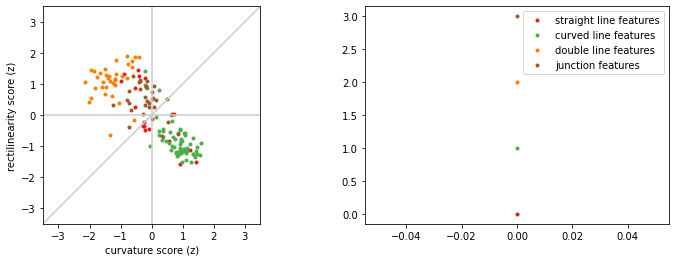

In [14]:
colors = cm.Set1(np.linspace(0,1,5))
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
for ii, inds in enumerate([is_single & (estim_bend_values==0), \
                           is_single & (estim_bend_values>0), \
                           is_double, is_junction]):
    plt.plot(curv_score[inds], lin_score[inds],'.',color=colors[ii,:])
plt.axis('square')
plt.xlim([-3.5, 3.5])
plt.ylim([-3.5, 3.5])
plt.axvline(0,color=[0.8, 0.8, 0.8])
plt.axhline(0,color=[0.8, 0.8, 0.8])
plt.plot([-3.5, 3.5], [-3.5, 3.5], color=[0.8, 0.8, 0.8])
plt.xlabel('curvature score (z)')
plt.ylabel('rectilinearity score (z)')

plt.subplot(1,2,2)
for ii in range(4):
    plt.plot(0,ii,'.',color=colors[ii,:])
plt.legend(['straight line features','curved line features', \
            'double line features','junction features'])

(-3.5, 3.5)

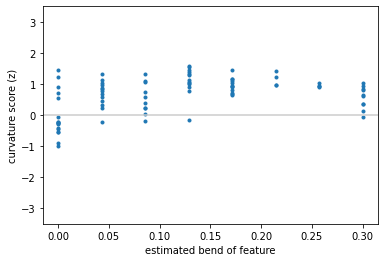

In [38]:
plt.figure();
inds = is_single
plt.plot(estim_bend_values[inds], curv_score[inds],'.')
plt.xlabel('estimated bend of feature')
plt.ylabel('curvature score (z)')
plt.axhline(0,color=[0.8, 0.8, 0.8])
plt.ylim([-3.5, 3.5])

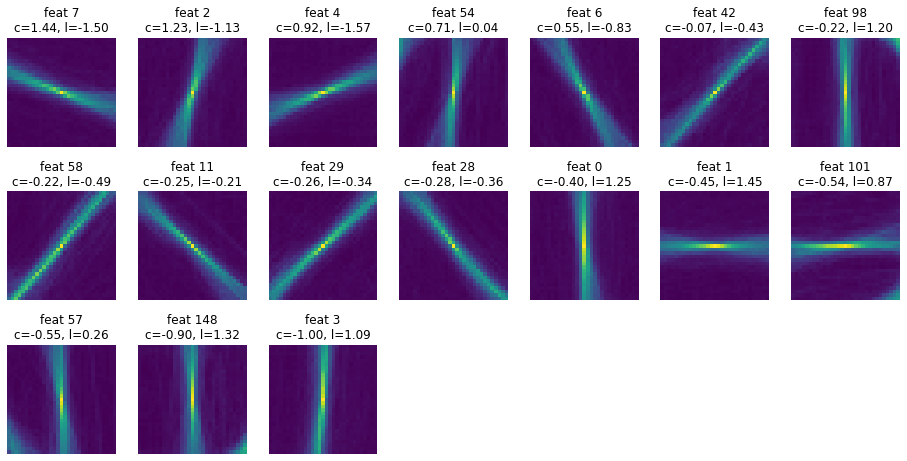

In [39]:
# plotting the straight-line features, as a function of curvature
# some of these got assigned fairly high curvature scores
inds = np.where(is_single & (estim_bend_values==0))[0]
plot_order = inds[np.flip(np.argsort(curv_score[inds]))]
n2plot = 64;
npx=3;npy=7;
plt.figure(figsize=(16,8));
for fi, ff in enumerate(plot_order):
    plt.subplot(npx,npy,fi+1)
    plt.pcolormesh(feature_ims[:,:,ff])
    plt.axis('square')
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('feat %d\nc=%.2f, l=%.2f'%(ff,curv_score[ff], lin_score[ff]))


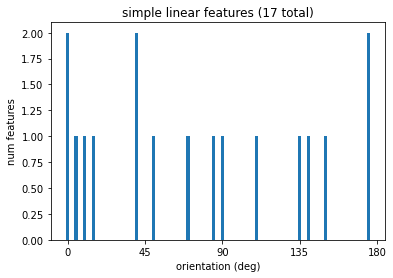

In [15]:

inds = is_single & (estim_bend_values==0)
ori = np.mod(estim_orient_values[inds],180)
counts = [np.sum(ori==oo) for oo in orient_values[0:36]]
assert(np.sum(counts)==len(ori))

plt.figure();
plt.bar(orient_values[0:36], counts, width=2)
plt.xticks([0,45,90,135,180]);
plt.ylabel('num features')
plt.title('simple linear features (%d total)'%len(ori))
plt.xlabel('orientation (deg)');

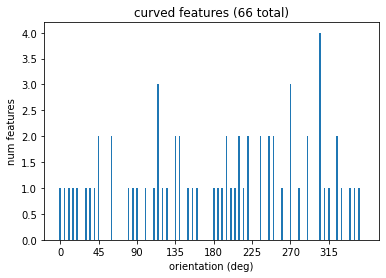

In [16]:

inds = is_single & (estim_bend_values>0)
ori = estim_orient_values[inds]
counts = [np.sum(ori==oo) for oo in orient_values]
assert(np.sum(counts)==len(ori))

plt.figure();
plt.bar(orient_values, counts, width=2)
plt.xticks(np.arange(0,360,45));
plt.ylabel('num features')
plt.title('curved features (%d total)'%len(ori))
plt.xlabel('orientation (deg)');

Text(0.5, 1.0, 'all single-line features (83 total)')

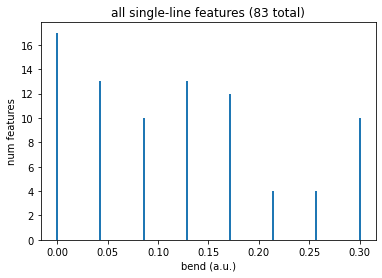

In [17]:

inds = is_single
bend = estim_bend_values[inds] 
bend_counts = [np.sum(bend==bb) for bb in bend_values]
assert(np.sum(bend_counts)==len(bend))

plt.figure();
plt.bar(bend_values, bend_counts, width=0.002)
plt.ylabel('num features')
plt.xlabel('bend (a.u.)');
plt.title('all single-line features (%d total)'%len(bend))

Text(0.5, 1.0, 'junction type features (31 total)')

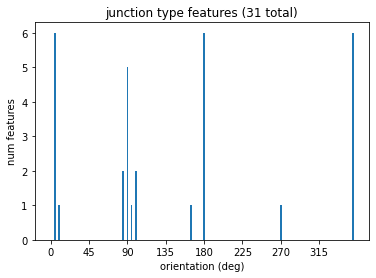

In [19]:

inds = is_junction

ori = estim_orient_values[inds] 
counts = [np.sum(ori==oo) for oo in orient_values]
assert(np.sum(counts)==len(ori))

bend = estim_bend_values[inds] 
bend_counts = [np.sum(bend==bb) for bb in bend_values]
assert(np.sum(bend_counts)==len(bend))

plt.figure();
plt.bar(orient_values, counts, width=2)
plt.xticks(np.arange(0,360,45));
plt.ylabel('num features')
plt.title('approx orientation')
plt.xlabel('orientation (deg)');

plt.title('junction type features (%d total)'%len(bend))

Text(0.5, 1.0, 'parallel line type features (35 total)')

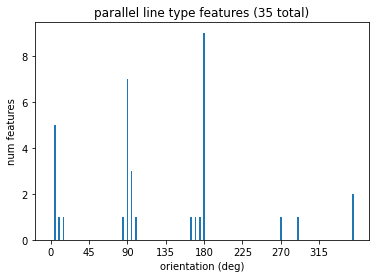

In [20]:

inds = is_double

ori = estim_orient_values[inds] 
counts = [np.sum(ori==oo) for oo in orient_values]
assert(np.sum(counts)==len(ori))

bend = estim_bend_values[inds] 
bend_counts = [np.sum(bend==bb) for bb in bend_values]
assert(np.sum(bend_counts)==len(bend))

plt.figure()
plt.bar(orient_values, counts, width=2)
plt.xticks(np.arange(0,360,45));
plt.ylabel('num features')
plt.title('approx orientation')
plt.xlabel('orientation (deg)');

plt.title('parallel line type features (%d total)'%len(bend))